In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

def perform_eda(df, max_features_per_plot=10):
    # Basic Dataset Info
    print("Dataset Overview:")
    print(df.info())
    
    # Summary Statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Checking for missing values
    print("\nMissing Values:")
    missing_values = df.isnull().mean() * 100  # Percentage of missing values
    print(missing_values[missing_values > 0])  # Show only columns with missing values

    # Drop columns with more than 50% missing values
    threshold = 50  
    cols_to_drop = missing_values[missing_values > threshold].index
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"\nDropped {len(cols_to_drop)} columns with >{threshold}% missing values.")

    # Impute remaining missing values
    imputer = SimpleImputer(strategy="median")  # Use median for numerical values
    df[df.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df.select_dtypes(include=[np.number]))

    # Unique Values in Each Column
    print("\nUnique Values per Column:")
    print(df.nunique())

    # Correlation Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=False)
    plt.title("Correlation Heatmap")
    plt.show()

    # Histogram of 10 random numerical features
    sample_features = np.random.choice(df.select_dtypes(include=[np.number]).columns, 10, replace=False)
    df[sample_features].hist(figsize=(12, 8), bins=30, edgecolor="black")
    plt.suptitle("Feature Distributions (Sampled)")
    plt.show()

    # Box Plots for Outlier Detection
    num_cols = df.select_dtypes(include=[np.number]).columns
    num_batches = (len(num_cols) // max_features_per_plot) + 1

    for i in range(num_batches):
        subset = num_cols[i * max_features_per_plot: (i + 1) * max_features_per_plot]
        if len(subset) == 0:
            break

        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[subset])
        plt.xticks(rotation=45)
        plt.title(f"Box Plots: Features {i * max_features_per_plot} - {i * max_features_per_plot + len(subset)}")
        plt.show()

    # PCA for Dimensionality Reduction (Visualizing in 2D)
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df.select_dtypes(include=[np.number]))
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Projection (First 2 Components)")
    plt.show()

    print("\nEDA Completed Successfully!")

# Example usage:
df = pd.read_csv("final.csv")
# perform_eda(df)


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient_ID                   1500 non-null   object 
 1   Age                          1500 non-null   int64  
 2   Gender                       1500 non-null   object 
 3   BMI                          1500 non-null   float64
 4   Smoker                       1500 non-null   int64  
 5   Alcohol_Consumption          1500 non-null   int64  
 6   Exercise_Hours_Per_Week      1500 non-null   int64  
 7   Blood_Pressure_Systolic      1118 non-null   float64
 8   Blood_Pressure_Diastolic     1124 non-null   float64
 9   Cholesterol_Level            1144 non-null   float64
 10  Glucose_Level                1105 non-null   float64
 11  Diabetes                     1500 non-null   int64  
 12  Hypertension                 1500 non-null   int64  
 13  

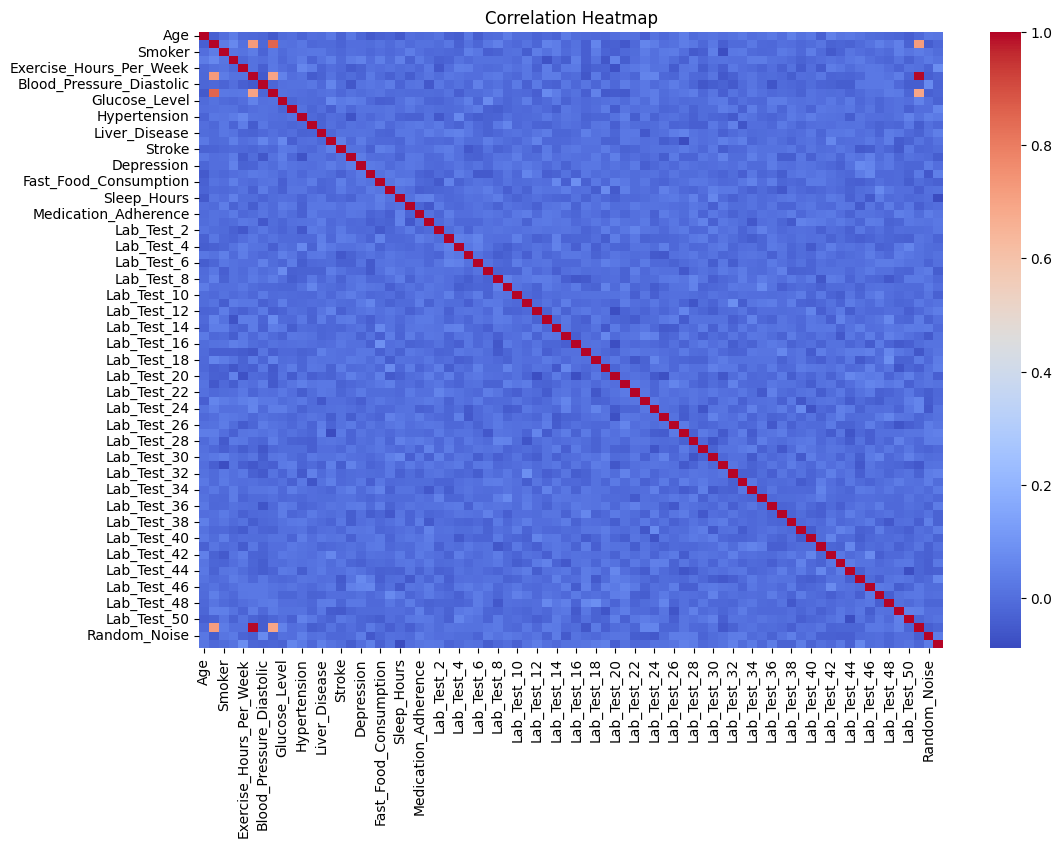

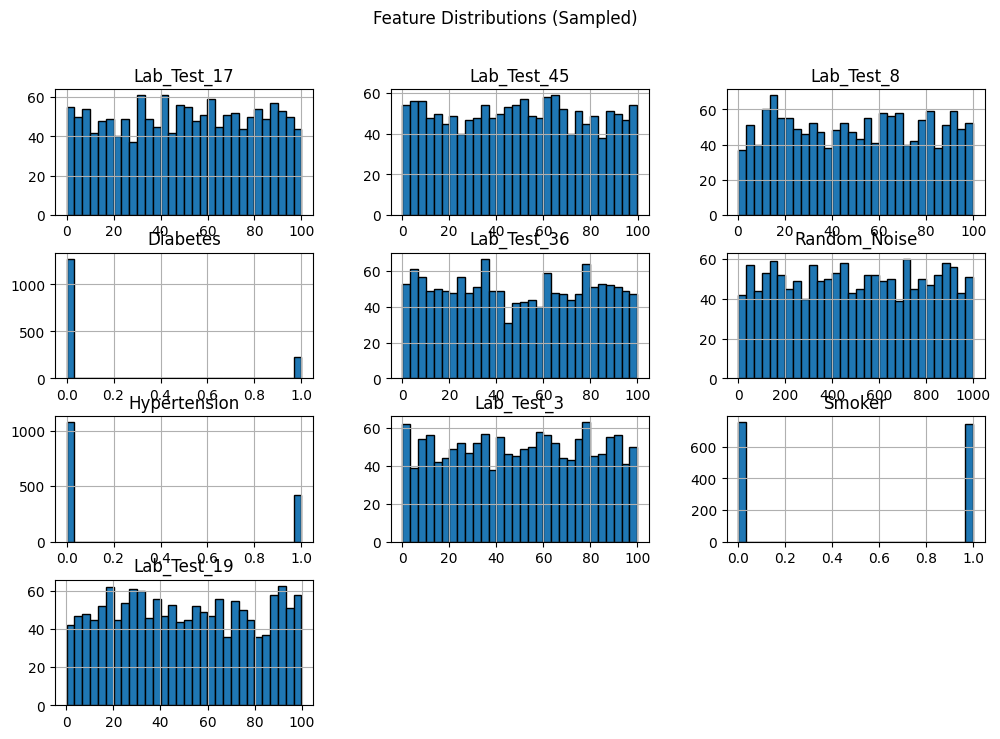

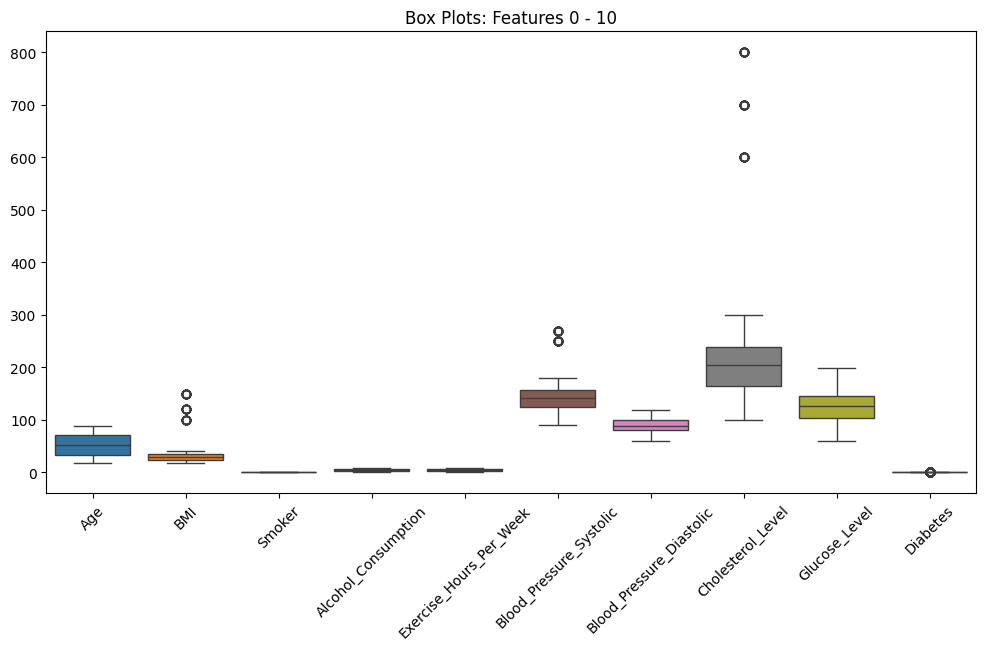

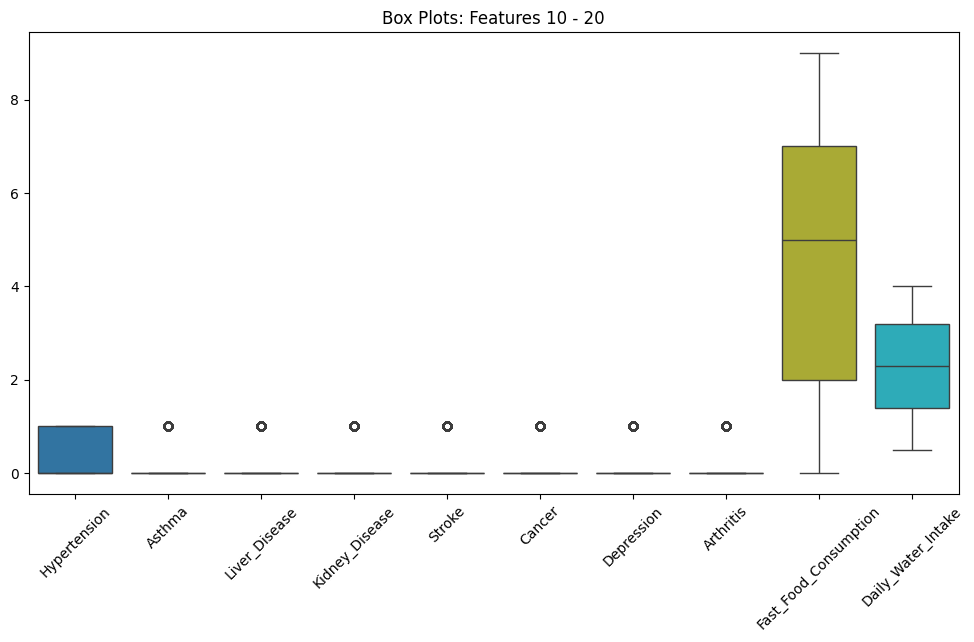

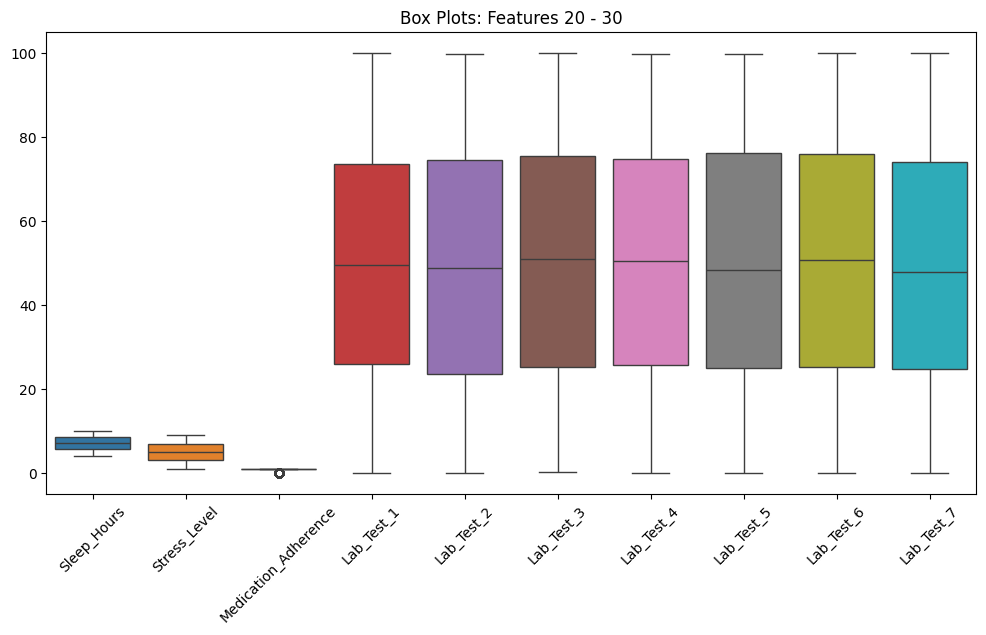

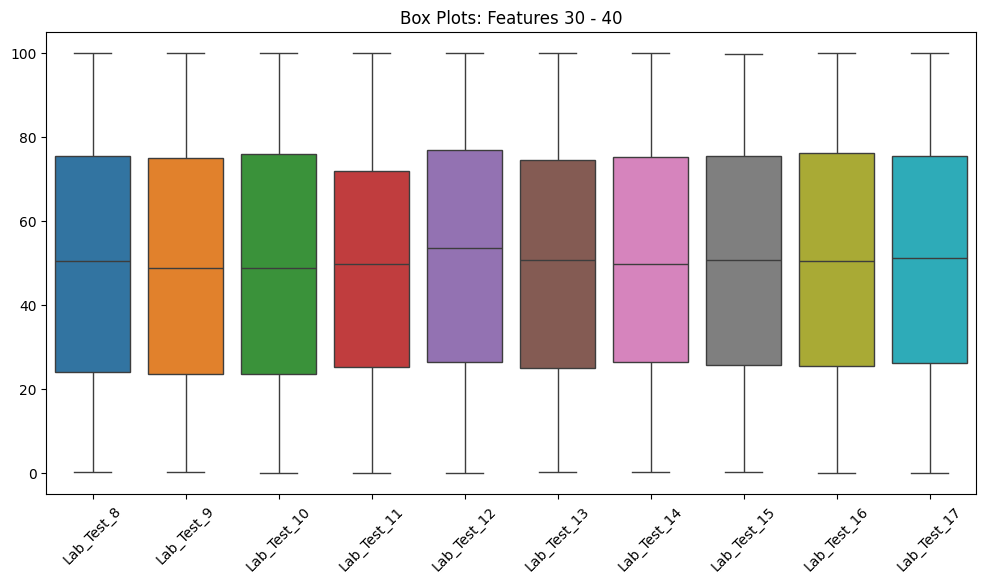

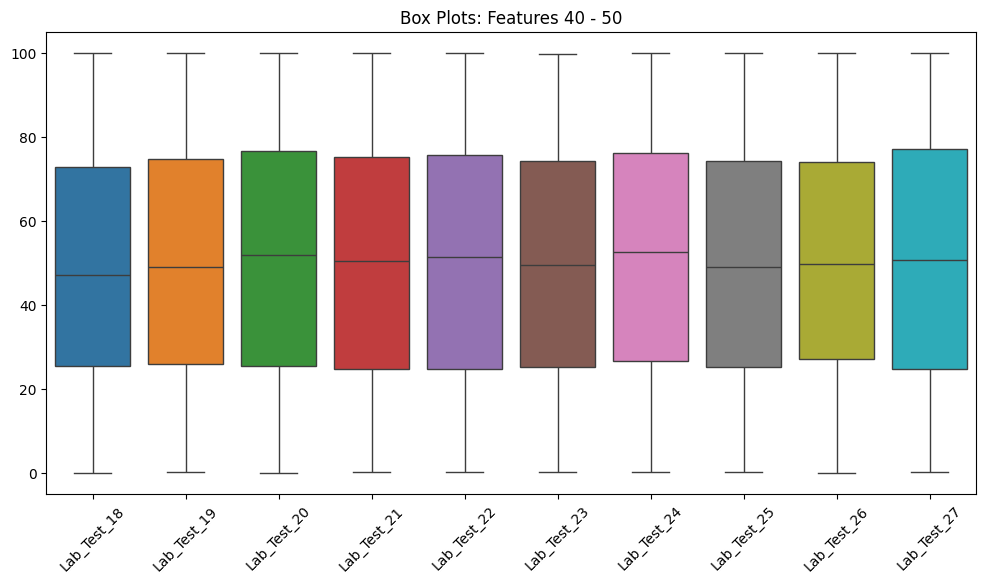

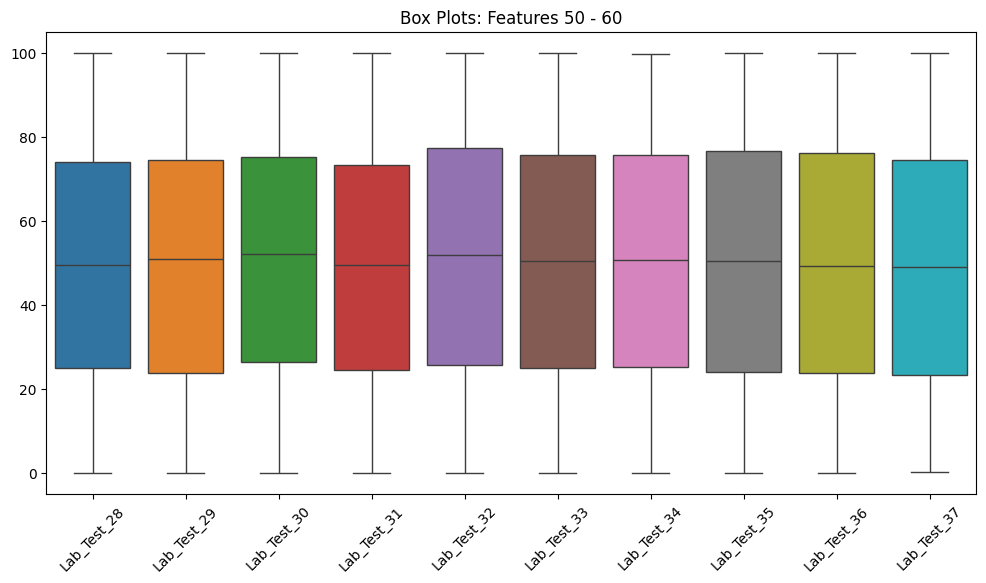

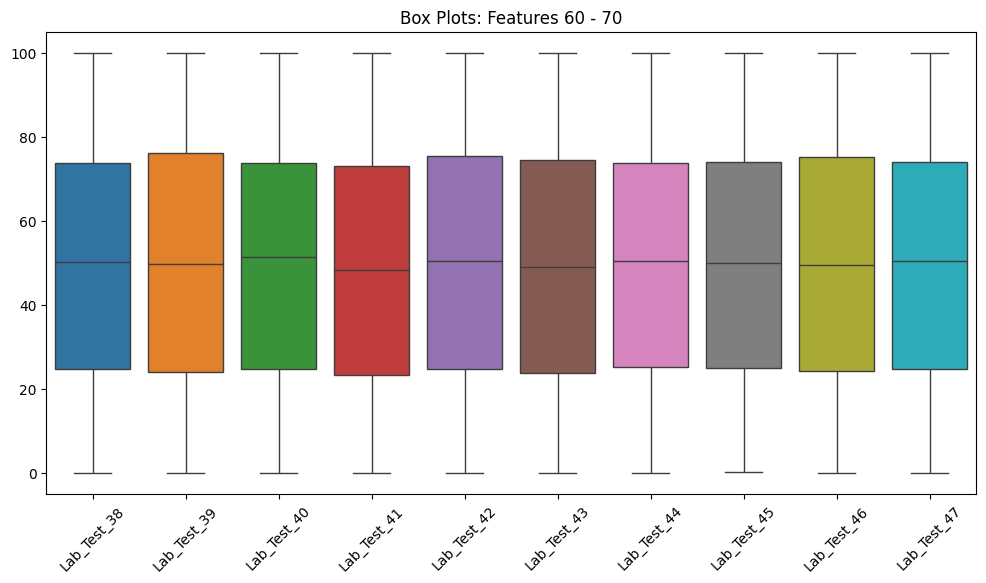

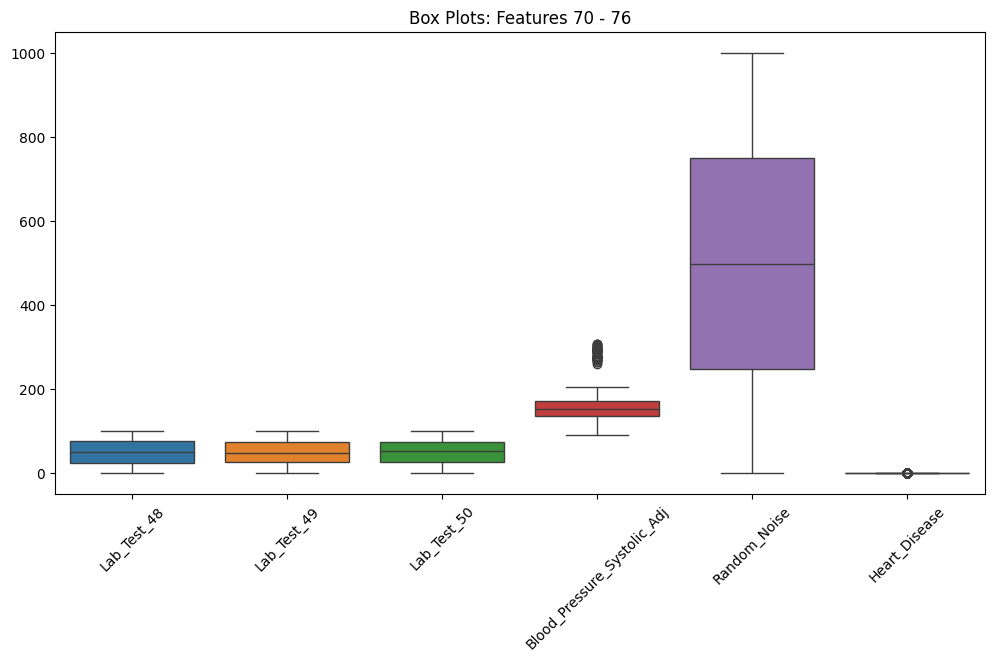

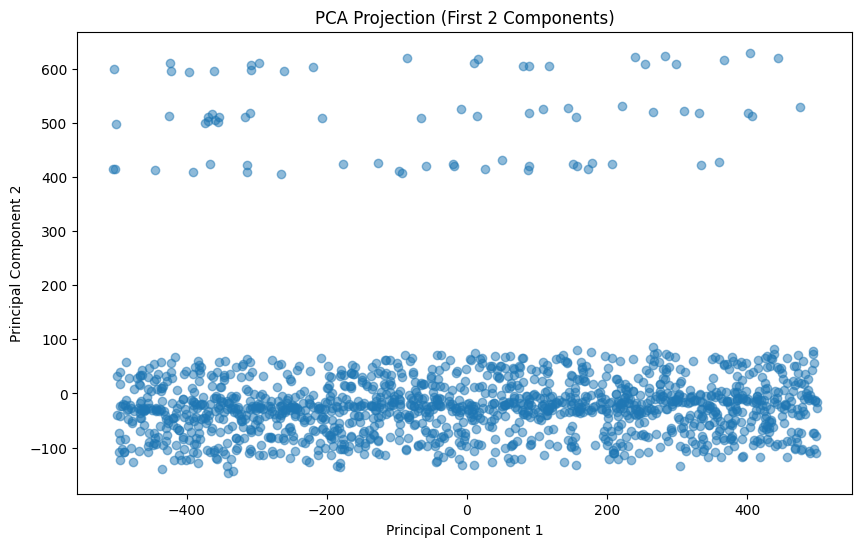


EDA Completed Successfully!


In [2]:
perform_eda(df)